# Trabajo Práctico 1 - Cálculo de Ranking Page

## Enunciado

### Pregunta 1 - ¿Por que la matriz A definida en (4) es equivalente a $p \ \mathbf{W} \ \mathbf{D} + e \ z^t$ ? Justificar.

Queremos probar que la matriz planteada en la matriz A coincide con la ecuación (1)

<div style="text-align:center">
\([a]_{i} = 
\begin{cases}
    p*\dfrac{1-p}{n} & \text{si } c_{j} \neq 0 \\
    \dfrac{1}{n} & \text{si } c_{j} = 0
\end{cases} \)
</div>

\begin{equation}
    A = pWD + eZ^t  \text{(1)} \\
\end{equation}

<div style="margin-bottom:20px; text-align:center">
\(pWD =
p \cdot \begin{bmatrix}
    0 & w_{12} & \cdots & w_{1n} \\
    w_{21}& 0 & \ddots &  w_{2n} \\
    \vdots & \vdots &\ddots &\vdots \\
    w_{n1} & w_{n2} & \cdots & 0
\end{bmatrix} \cdot \begin{bmatrix}
    1/c_{1}& 0 & \cdots & 0 \\
    0& 1/c_{2} & \cdots &  0\\
    \vdots & \vdots &\ddots &\vdots \\
    0 & 0 &\cdots & 1/c_{n}
\end{bmatrix} \)
</div>

<div style="margin-bottom:20px; text-align:center">
\(pWD =
\begin{bmatrix}
    0 & p*w_{12}/c_{2} & \cdots &p*w_{1n}/c_{n}\\
    p*w_{21}/c_{1}& 0 & \ddots &  p*w_{2n}/c_{n} \\
    \vdots & \vdots &\ddots &\vdots \\
    p*w_{n1}/c_{1} & w_{n2}/c_{2} & \cdots & 0
\end{bmatrix} \)
</div>


<div style="margin-bottom:20px; text-align:center">
\(donde  [pWD]_{ij} = 
\begin{cases}
    p*\dfrac{w_{ij}}{c_{j}} & \text{si } c_{j} \neq 0 \\
    0 & \text{si } c_{j} = 0
\end{cases} \)
</div>


<div style="margin-bottom:20px; text-align:center">
\(eZ^t =
\begin{bmatrix}
    1\\
    \vdots \\
    1
\end{bmatrix} \cdot \begin{bmatrix}
    z_{1}  & \cdots & z_{n}\\
\end{bmatrix} =  
\begin{bmatrix}
    z_{1} & \cdots &z_{n}\\
    z_{1} & \cdots &  z_{n} \\
    \vdots &\cdots &\vdots \\
    z_{1} & \cdots & z_{n} 
\end{bmatrix}  \)
</div>

Entonces... 

<div style="margin-bottom:20px; text-align:center">
\(pWD + eZ^t=
\begin{bmatrix}
    0 & p*w_{12}/c_{2} & \cdots &p*w_{1n}/c_{n}\\
    p*w_{21}/c_{1}& 0 & \ddots &  p*w_{2n}/c_{n} \\
    \vdots & \vdots &\ddots &\vdots \\
    p*w_{n1}/c_{1} & w_{n2}/c_{2} & \cdots & 0
\end{bmatrix} +  
\begin{bmatrix}
    z_{1} & \cdots &z_{n}\\
    z_{1} & \cdots &  z_{n} \\
    \vdots &\cdots &\vdots \\
    z_{1} & \cdots & z_{n} 
\end{bmatrix}   \)
</div>

<div style="margin-bottom:20px; text-align:center">
\(pWD + eZ^t=
\begin{bmatrix}
    z_{1} & \cdots & p*w_{1n}\dfrac{p*w_{1n}}{c_{n}} +z_{n}\\
    \vdots &\cdots &\vdots \\
    \dfrac{p*w_{n1}}{c_{1}}+z_{1} & \cdots & z_{n} \
\end{bmatrix}   \)
</div>

<div style="margin-bottom:20px; text-align:center">
\(donde [Z]_{i} = 
\begin{cases}
    p*\dfrac{1-p}{n} & \text{si } c_{j} \neq 0 \\
    \dfrac{1}{n} & \text{si } c_{j} = 0\\
\end{cases}  \)
</div>

Con esto podemos ver que la matriz resultante corresponde a 

<div style="margin-bottom:20px; text-align:center">
\([pWD +eZ^t]_{ij} = 
\begin{cases}
    p*\dfrac{1-p}{n} & \text{si } c_{j} \neq 0 \\
    \dfrac{1}{n} & \text{si } c_{j} = 0
\end{cases}  \)
</div>

Finalmente, la matriz obtenida mediante la ecuación (1) coincide con la matriz A.


### Pregunta 2 -  ¿Cómo se garantiza existencia de la factorización $LU$? ¿ La matriz $(\mathbf{I} - p \ \mathbf{W} \ \mathbf{D})$ está bien condicionada? ¿Cómo influye el valor de $p$?

### ¿Cómo se garantiza existencia de la factorización  𝐿𝑈?  

Queremos probar que teniendo una matriz $A = I - pWD$ , ésta admite descomposicion LU, si A es diagonal dominante.

Se dice que una matriz cuadrada es *diagonal dominante* (por filas) si el valor absoluto de la entrada en la diagonal principal de una fila es mayor o igual a la suma de los valores absolutos de todas las demás entradas (no diagonales) de esa fila.

W es aquella matriz que se construye estableciendo wij = 1 si la página j tiene un link a la página i y $w_{ij}$ = 0 en caso contrario.
Además $w_{ii} \neq 0$  pues ignoramos los autolinks.
Tomamos W $\in \mathbb{R}^{3 \times 3}$.

<div style="text-align:center">
\( W = 
\begin{pmatrix}
0 & a & b \\
c & 0 & d \\
e & f & 0
\end{pmatrix} \)
</div>

Luego, D es una matriz diagonal con elementos $d_{jj}$ de la forma:

\begin{equation}
  d_{jj} = \left\lbrace
  \begin{array}{ll}
    \frac{1}{c_j} & \text{si } c_j \neq 0\\
    0 & \text{si } c_j = 0
  \end{array}
  \right.
\end{equation}

El termino $-pWD$, nos da como resultado una matriz con ceros en la diagonal.


<div style="text-align:center">
\(-pWD = 
\begin{pmatrix}
    0 & -pah & -pbi\\
    -pcg & 0 & -pdi\\
    -peg & -pfg & 0
  \end{pmatrix} \)
</div>

A esta matriz se le debe sumar la identidad y aplicarle modulo. Vemos que se obtiene:


<div style="text-align:center">
\(|I-pWD| = 
\begin{pmatrix}
    1 & |pah| & |pbi|\\
    |pcg| & 1 & |pdi|\\
    |peg & |pfg| & 1
  \end{pmatrix} \)
</div>

Observemos los términos fuera de la diagonal. Tomemos ∣𝑝𝑎ℎ∣ como representante:
\begin{equation}
    |1| \geq  |p*a*h|
\end{equation}

Recordemos que $ p\in (0,1)$, y $a$ y $h \in [0,1]$. Como $0<p<1$,  $0 \leqslant a,h \leqslant 1$, pah no puede ser mayor a 1

Debido a que 𝐴 es una matriz diagonal dominante, existe su descomposición LU.

### ¿ La matriz  (𝐈−𝑝 𝐖 𝐃) está bien condicionada? ¿Cómo influye el valor de  𝑝?

Notemos que cond(A) = (𝐈−𝑝 𝐖 𝐃)

Cuando p tienda a 0, $pWD$ tendera a cero, por lo que:

$cond(A)$ $\approx (I)$ $\Longrightarrow$ $cond(A)$ tiende a 1

Que pasa cuando p tiende a 1? Cuanto mas grande es el p, se le da mayor importancia a las conexiones entre nodos. En cambio, cuanto menor el p, la componente aleatoria tiene mayor peso.

Probamos experimentalmente que ocurre cuando p tiende a 1, para la matriz de del test_dosestrellas y vemos que $cond(A)$ se hace cada vez mayor. 

En la diagonal principal tendremos valores que tienden a cero, y por fuera de ella valores > 0. Como las filas suman 0, son linealmente dependientes

Inmediatamente a continuacion, se representa graficamente la variacion del número de condicion para la matriz 'test_dosestrellas' en funcion del valor p

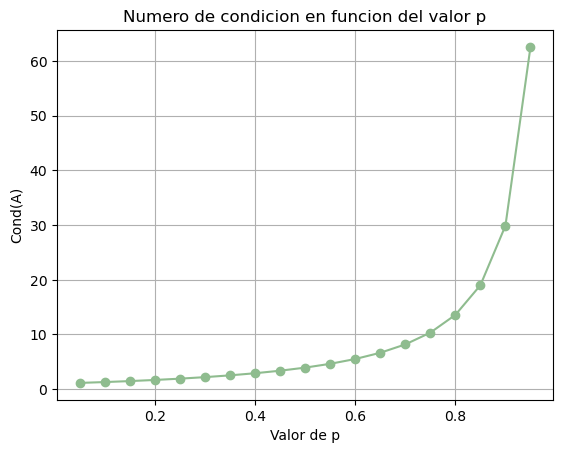

In [9]:
experimento_cond(DS)

---

## Implementación
## !!! A tener en cuenta!! los grafos comienzan enumerando las paginas en 1, mientras que el resto de los graficos comienzan en la pagina 0

Implementar la factorización $LU$ para resolver el sistema de ecuaciones (6) que permite hallar la solución buscada (es decir, el ranking de páginas). Se podrá utilizar la función **scipy.linalg.solve_triangular** para resolver sistemas triangulares.

En el siguiente cuerpo de la notebook se genera un test que va a evaluar la función que resuelve el sistema a través de un test unitario. La resolución debe realizarse en el archivo **funciones.py** que acompaña el **template-alumnos**.

In [11]:
from funciones import *

### Test Unitario
En el archivo funciones.py hay que implementar la función que obtienen el ranking de las páginas.
Se espera que el llamado a la siguiente función arroje un valor esperado

**************************************************
Test unitario 1
BIEN! - Paso correctamente el test unitario
**************************************************


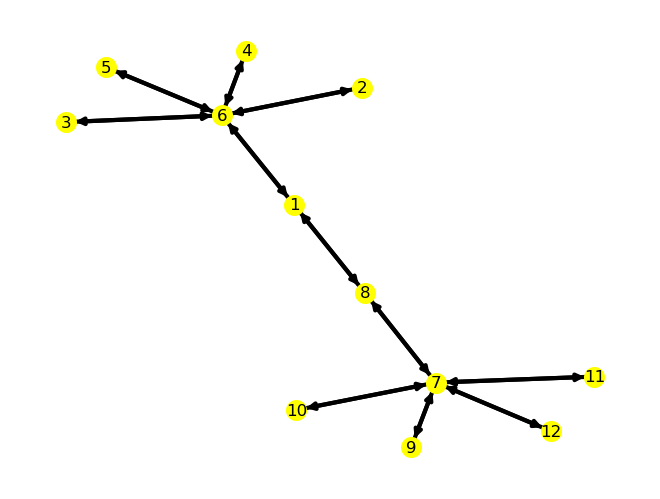

In [5]:
#ARCHIVOS DE ENTRADA
archivo_test = './tests/test_dosestrellas.txt'
    
#CARGA DE ARCHIVO EN GRAFO
W = leer_archivo(archivo_test)

dibujarGrafo(W, print_ejes=False)
# defino la probabilidad de salto de continuar los links de la pagina actual
p = 0.5
# Realizo el test unitario para el calculo del mayor score, que pruebe que el codigo funciona correctamente.
print('*'*50)
print('Test unitario 1')
try:
    compara = obtenerMaximoRankingScore(W, p)
    assert(np.isclose(compara, 0.1811, atol= 0.0001))
except:
    print('OUCH!! - No paso el test unitario')
else:
    print('BIEN! - Paso correctamente el test unitario')
print('*'*50)


### Test Unitarios Adicionales

El grupo **deberá** proponer al menos 3 instancias de prueba no triviales, dos de las cuales deben ser de tipo TODOS LOS NODOS CONECTADOS, y otra de tipo NINGUNO CONECTADO. La tercera instancia queda a criterio del grupo.

Para el análisis, guiarse y responder las siguientes preguntas: 

* ¿Cómo es el ranking obtenido en cada caso de acuerdo a la estructura del grafo páginas? 
* ¿Qué conclusiones pueden sacar de la interpretación de los resultados?

Graficar los grafos usando las funciones en el **funciones.py**.

# ninguno conectado


Al realizar el caso de prueba ninguno conectado podemos observar que todas las paginas obtuvieron el mismo puntaje, lo cual era esperable yaque como todas la paginas tenian un puntaje de cero los componentes de la matriz "A" son todos iguales (1/20). 

Ejes:  []


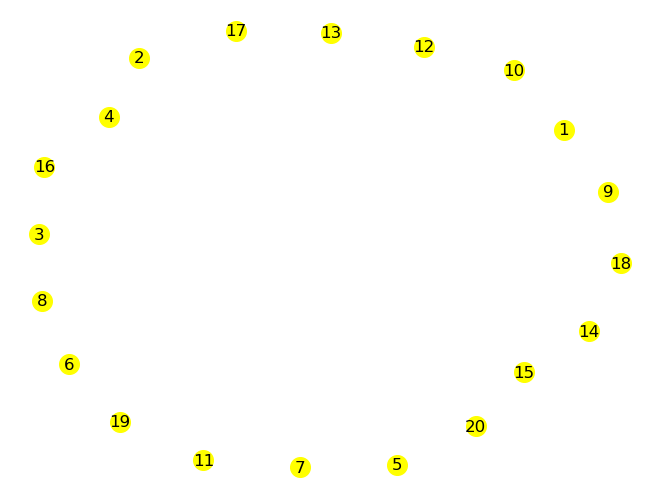

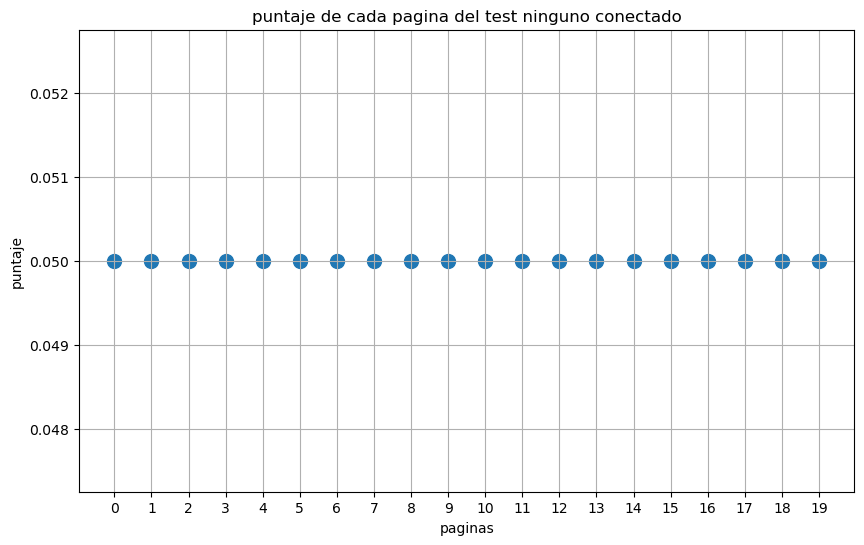

In [5]:
dibujarGrafo(ninguno_conectado)
Graf_scores(ninguno_conectado, "ninguno conectado", 0.5)

Asi mismo podemos observar como los resultados se mantienen constantes al variar el p (todas las paginas empatan en el primer lugar del ranking), esto tambien se debe a que los elementos finales de la matriz A son independientes de p. 

In [6]:
graf_rankingP2(ninguno_conectado, "ninguno conectado" )

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

---

# TODOS CONECTADOS


Al realizar este analisis se esperaba que tambien ocurra un empate de todas las paginas, pero en este caso debido a que todas presentan el mismo puntaje, no por la falta de este. En el segundo grafico se observa como toodas las paginas obtuvieron el mismo puntaje con el p= 0.5 

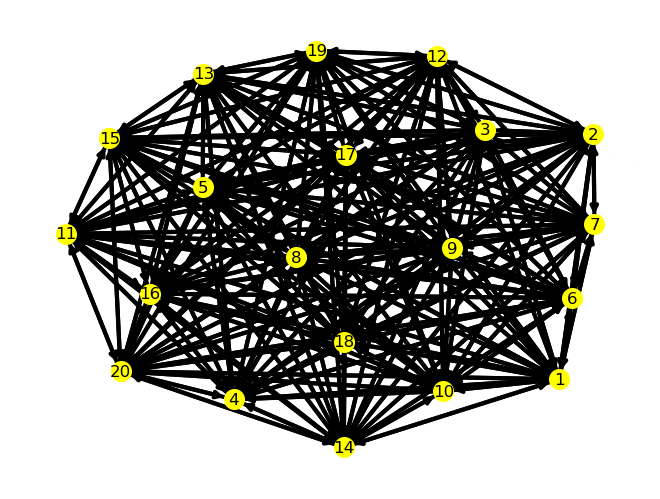

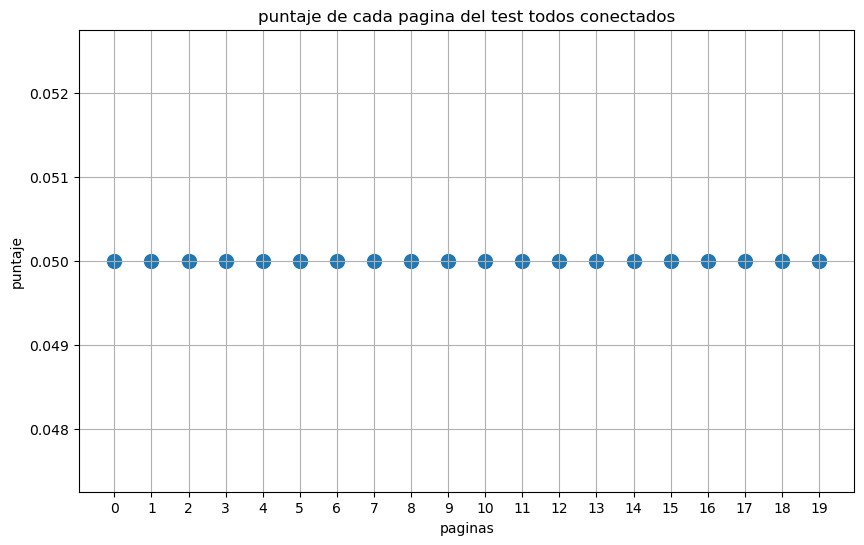

In [7]:
tc= todos_conectados()
dibujarGrafo(tc, print_ejes= False)
Graf_scores(tc, "todos conectados", 0.5)

Asi mismo esperabamos que esto varie un poco si variabamos el p yaque esta ves las componentes de A si dependian del mismo. Esto mismo puede ser observado en el siguiente grafico, donde las paginas mejores rankeadas difieren al variar el p.

In [15]:
graf_rankingP2(tc, "todos conectados" )

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

### 3º test


Para el tercer test, planteamos un grafo donde casi todas las páginas se conectan con dos páginas (6 y 8), y a su vez, estas dos solo se conectan a una (16), la cual además tiene 2 conexiones de otras páginas que también solo apuntan a ella. Nos parecía interesante observar cómo la "importancia" de una página influye en el puntaje y ranking de la página a la que "linkea".

En el segundo gráfico, podemos observar que efectivamente las páginas con más conexiones "entrantes" tuvieron el mejor puntaje. Igualmente, la página 16 también obtuvo un puntaje alto a pesar de las pocas conexiones. Esto se debe a que estaba siendo linkeada por páginas con un puntaje alto y, a diferencia de las páginas que se conectaban a la 6 y 8, al tener solo un enlace saliente, su conexión tenía un mayor "peso".

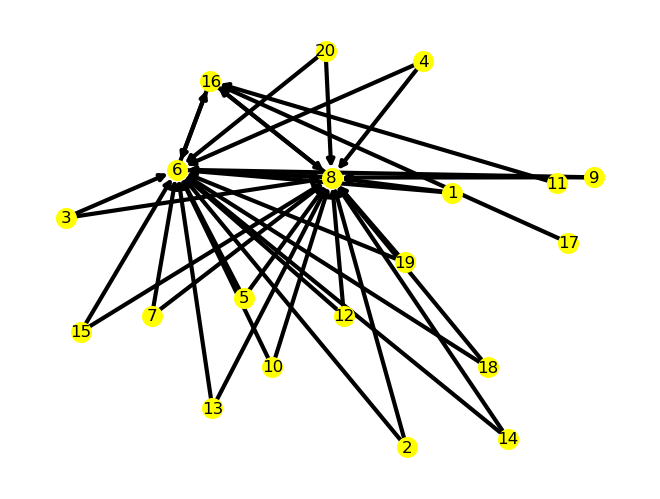

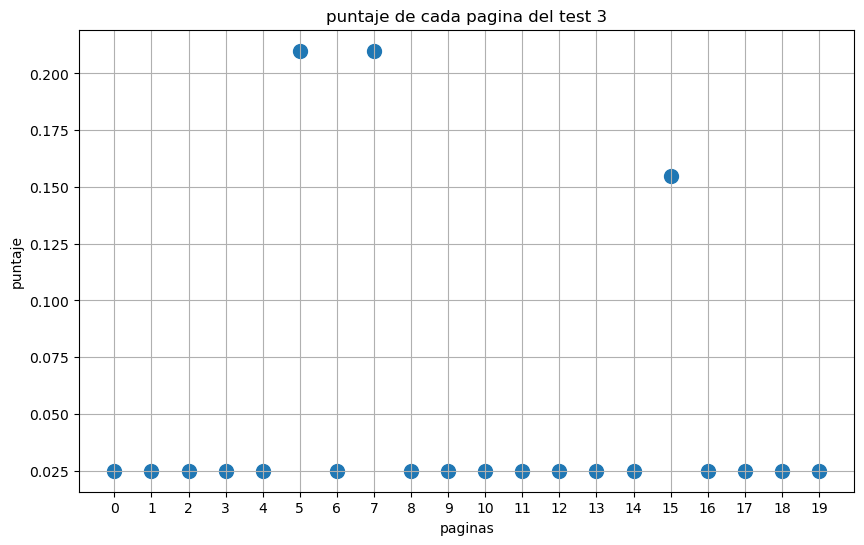

In [9]:
t3= matriz_t2()
dibujarGrafo(t3, print_ejes= False)
Graf_scores(t3, "3", 0.5)

Al variar el valor de pp, los resultados no difirieron mucho del experimento inicial. Siempre se mantuvo la variación en el primer lugar del ranking entre las páginas más linkeadas.

In [12]:
graf_rankingP2(t3, "3" )

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

## Enunciado

Sobre los casos de test que se encuentran en el folder `tests`, se pide realizar los análisis siguientes para todos los grafos del folder.

### Análisis Cuantitativo

Para el análisis cuantitativo, se pide, como mínimo, estudiar los tiempos de procesamiento en función del tamaño del grafo de páginas y de la densidad del mismo. Para esto, se espera que presenten gráficos mostrando los tiempos de ejecución para obtener la solución en función de la cantidad de nodos/links de diferentes grafos de páginas aleatorios.


En el primer gráfico se muestra el tiempo de procesamiento del rankingpage para matrices de diversas dimensiones con conexiones aleatorias para dos valores distintos de p. Se evidencia que a medida que aumenta la dimensión de la matriz, el tiempo de procesamiento también aumenta, aunque se observan saltos abruptos en la ejecución del programa al aumentar la dimensión de la matriz. Para abordar esto, se realizó un segundo gráfico utilizando la misma prueba pero manteniendo constante el número de conexiones en la matriz. En este segundo gráfico, se tambien se aprecia que si bien hay gradual en el tiempo de ejecución a medida que crece la dimensión de la matriz, sigue habiendo picos de crecimiento con algunas matrices. Además, se puede observar en ambos graficos que hay una variación muy pequeña en el tiempo de ejecución con diferentes valores de p.


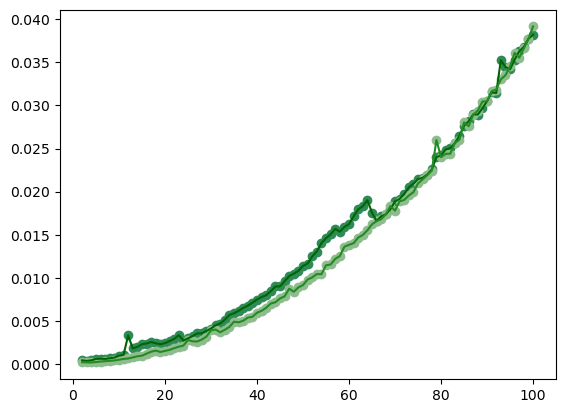

In [24]:
graf_tiempo_tamaño()

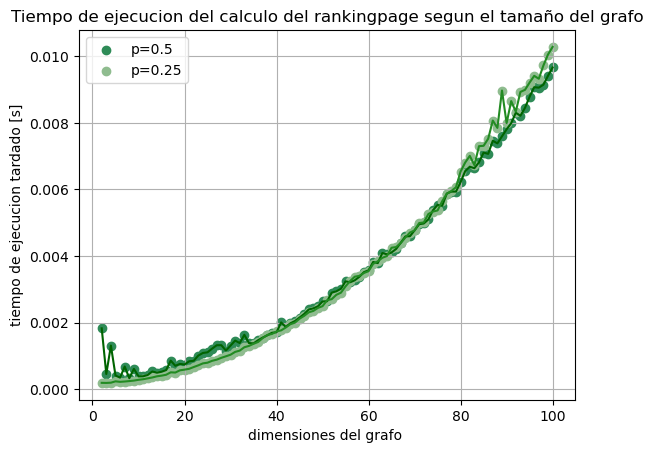

In [25]:
graf_tiempo_tamaño2()

Para estudiar el tiempo de procesamiento del cálculo del ranking de páginas en relación con la densidad (cantidad de conexiones) dentro del grafo, se elaboraron dos gráficos utilizando matrices de dos tamaños distintos. En cada matriz, se incrementaba gradualmente la cantidad de conexiones hasta que todas las filas y columnas estuvieran interconectadas, excluyendo la diagonal. Los gráficos muestran cómo, al aumentar las conexiones, el tiempo de procesamiento se incrementa, aunque este crecimiento no es tan uniforme como el observado con el tamaño de las matrices. Asimismo, se nota que el tiempo de procesamiento utilizando la matriz de mayor dimensión es inicialmente mayor, lo cual concuerda con lo visto en los graficos anteriores.

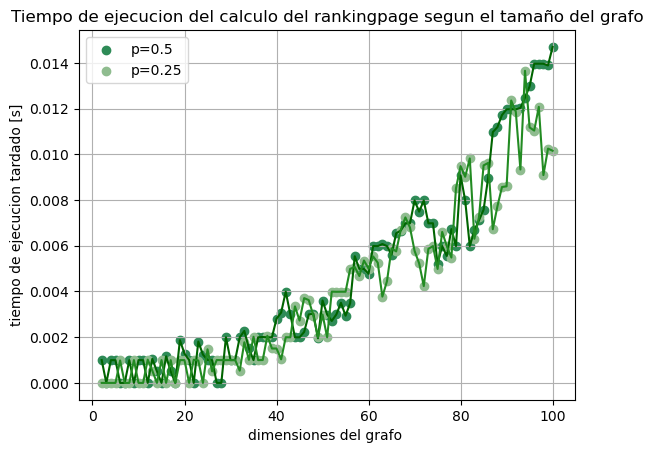

In [15]:
graf_tiempo_tamaño2()

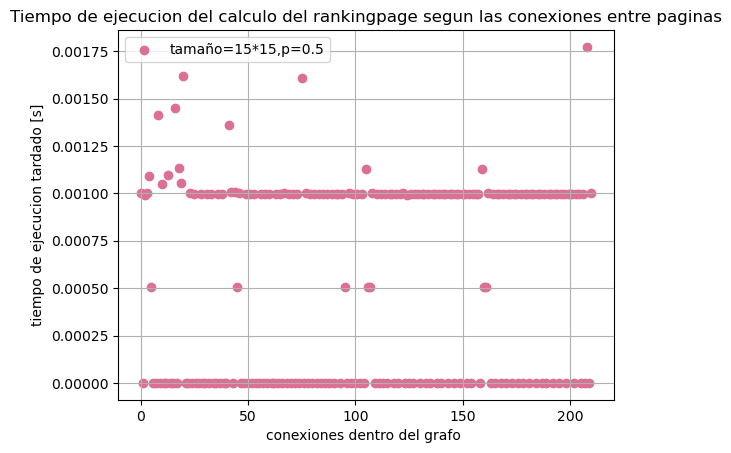

In [17]:
graf_tiempo_densidad()


# Análisis Cualitativo

Para el análisis cualitativo se deberán estudiar los rankings obtenidos, en función de la estructura del grafo, y del valor de $p$. Para esto, se espera que presenten gráficos mostrando las probabilidades de las páginas mejor rankeadas en función del valor de $p$. 


Para este analisis y teniendo en consideracion que los resultados no variaron en gran manera para cada test, se decidio tomar el test dos estrellas e instagram.

## Dos estrellas
En esta seccion se observa el dibujo de grafo y las paginas mejor rankeadas segun el p. Podemos observar, teniendo en cuenta la diferencia de indices, que las paginas 6 y 7 son las mas rankeadas. El 51.7% de las veces la pagina 6 fue mejor rankeada. Esto concuerda con el grafo realizado, donde ambas paginas tienen multiples paginas "yendo" hacia ellas

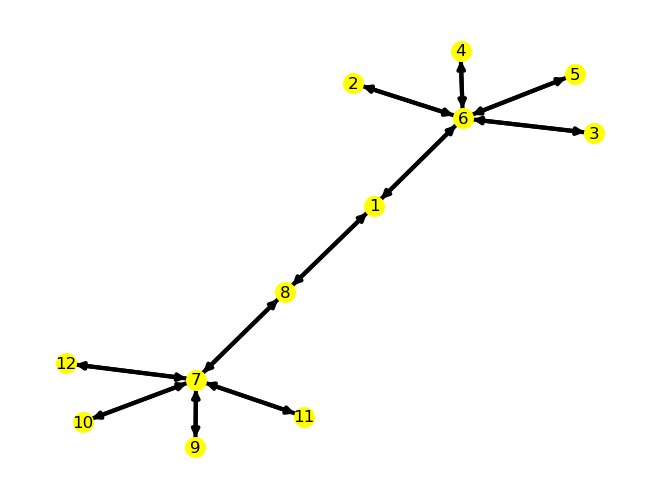

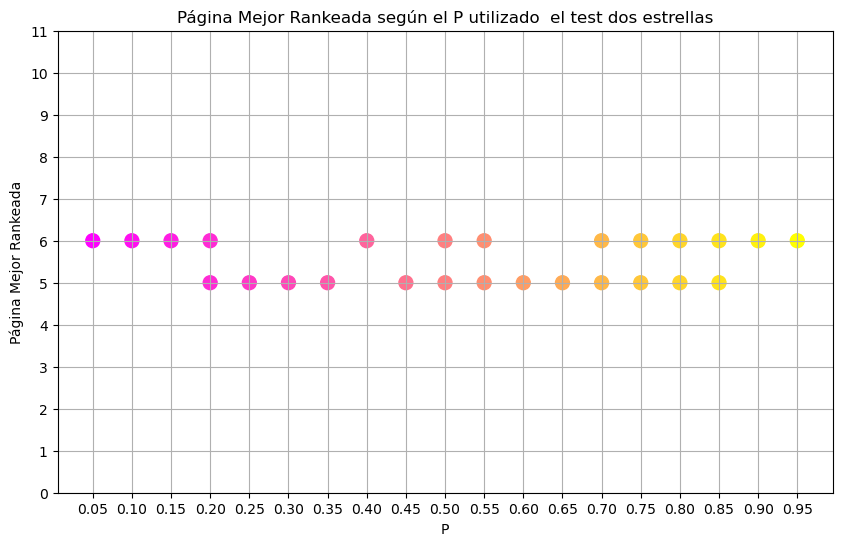

In [20]:
## poner grafo y scatter y torta de dos estrellas y otro
dibujarGrafo(DS, print_ejes= False)
graf_rankingP2(DS, 'dos estrellas')


## Instagram

Para el caso del test de random. Se observa que la pagina 5 del grafo, deberia ser la mas rankeada. Al calcular los rankings variando el p, se observa que para el 100% de los valores de p, esta pagina resulto ser la mas rankeada. Concluimos que los valores obtenidos, concuerdan con el grafo

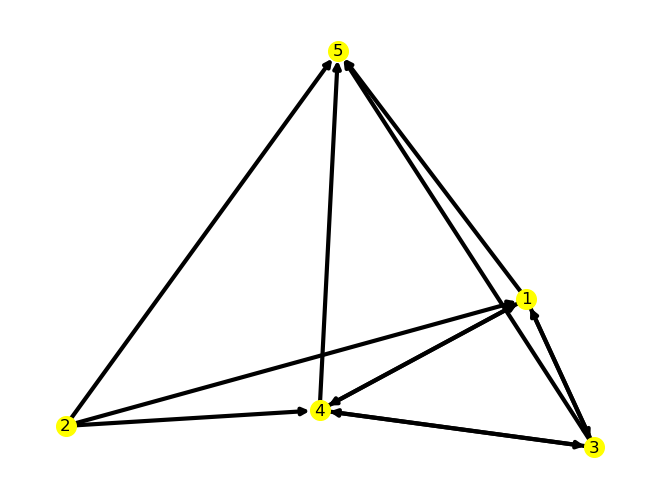

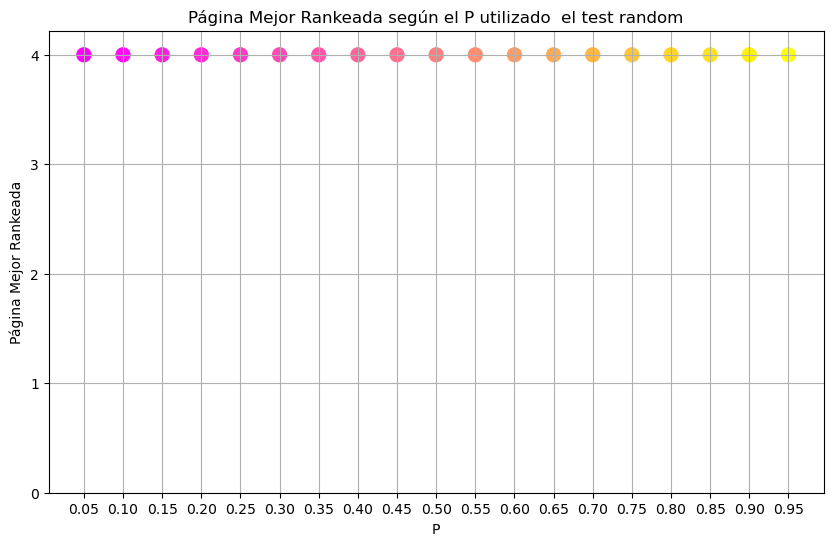

In [9]:
dibujarGrafo(A, print_ejes= False)
graf_rankingP2(A, 'random')

### Dos estrellas

Para el caso **test_dosestrellas.txt** se pregunta: 

¿Cuál es la mínima cantidad de links que se deben agregar para que la pagina correspondiente al nodo 1 quede primera en el ranking? ¿ Cómo se modificó la conectividad? Analizar.



La cantidad de conexiones necesarias para posicionar la página correspondiente al nodo uno en el primer lugar del ranking fue de 9. Como se puede apreciar en el gráfico adjunto, estas nuevas conexiones no solo elevaron el puntaje de la página 1, sino que también redujeron el puntaje de todas las páginas, especialmente aquellas que anteriormente empataban en el primer lugar. Este resultado es consistente con nuestras expectativas, ya que al añadir más conexiones "salientes" a varias páginas, se reduce el peso que estas suman al puntaje de las páginas a las que están vinculadas.


se agregaron 9 conexiones


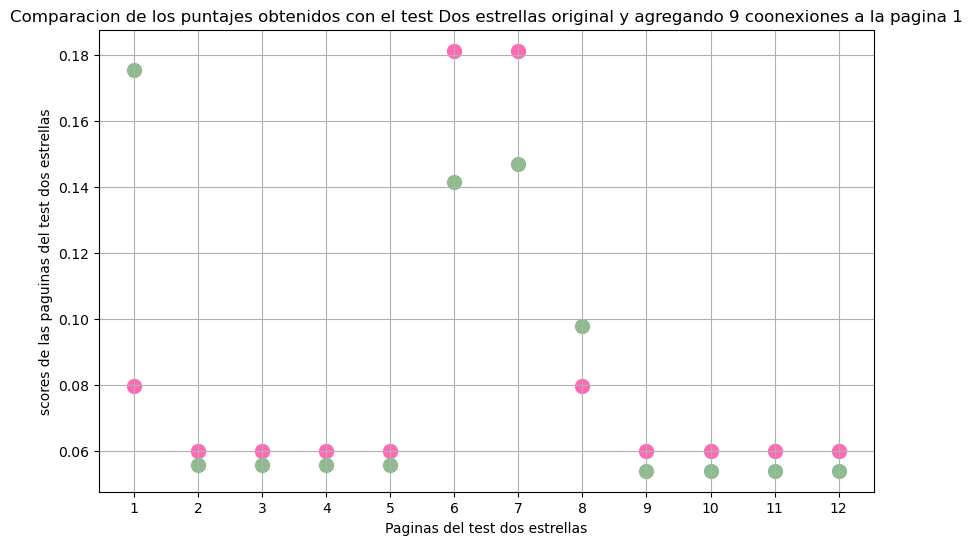

In [18]:
comparacion_DS()